In [1]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
simulation_folder = r"F:\little_fish_simulation_logs_4eyes_ff"
min_generation = 0
max_generation = 40

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [3]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000000, 1 / 41 ...
reading generation_0000001, 2 / 41 ...
reading generation_0000002, 3 / 41 ...
reading generation_0000003, 4 / 41 ...
reading generation_0000004, 5 / 41 ...
reading generation_0000005, 6 / 41 ...
reading generation_0000006, 7 / 41 ...
reading generation_0000007, 8 / 41 ...
reading generation_0000008, 9 / 41 ...
reading generation_0000009, 10 / 41 ...
reading generation_0000010, 11 / 41 ...
reading generation_0000011, 12 / 41 ...
reading generation_0000012, 13 / 41 ...
reading generation_0000013, 14 / 41 ...
reading generation_0000014, 15 / 41 ...
reading generation_0000015, 16 / 41 ...
reading generation_0000016, 17 / 41 ...
reading generation_0000017, 18 / 41 ...
reading generation_0000018, 19 / 41 ...
reading generation_0000019, 20 / 41 ...
reading generation_0000020, 21 / 41 ...
reading generation_0000021, 22 / 41 ...
reading generation_0000022, 23 / 41 ...
reading generation_0000023, 24 / 41 ...
reading generation_0000024, 25 / 41 ...
reading g

In [4]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
19413,19,fish_241213_18_46_09.452702,13,False
1140,1,fish_241213_13_15_46.458616,13,True
8840,8,fish_241213_15_14_43.024162,13,False
3946,3,fish_241213_13_41_17.338064,14,False
843,0,fish_241213_13_16_15.100483,14,False
...,...,...,...,...
31435,31,fish_241214_00_56_06.491754,11057,False
32727,32,fish_241214_01_24_12.657194,11123,False
35044,35,fish_241214_01_24_07.856259,11592,True
40100,40,fish_241214_03_55_41.929206,13980,True


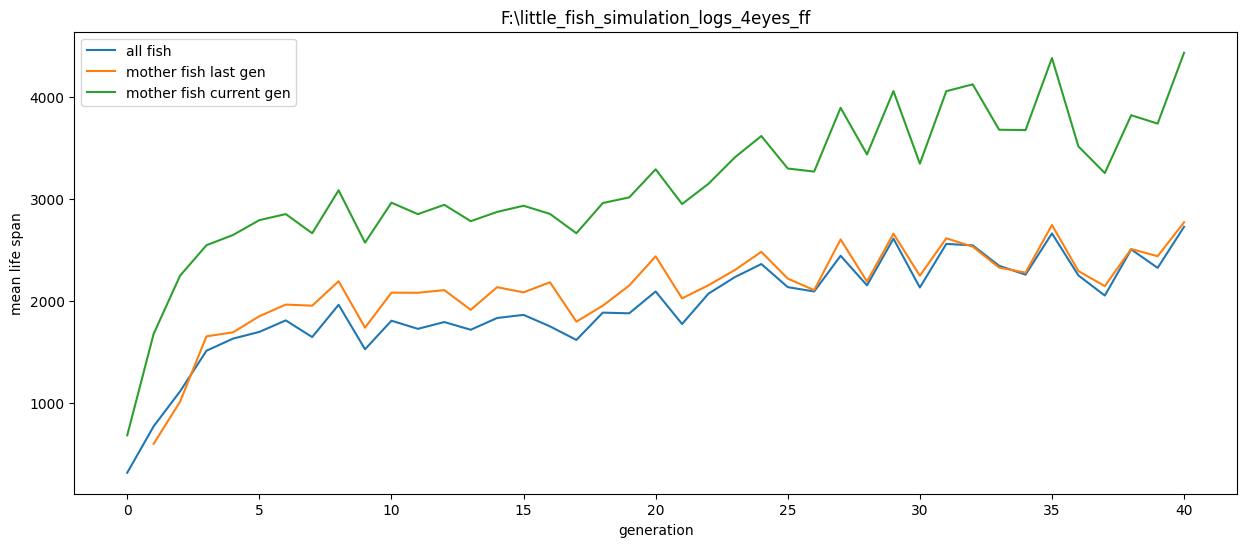

In [5]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

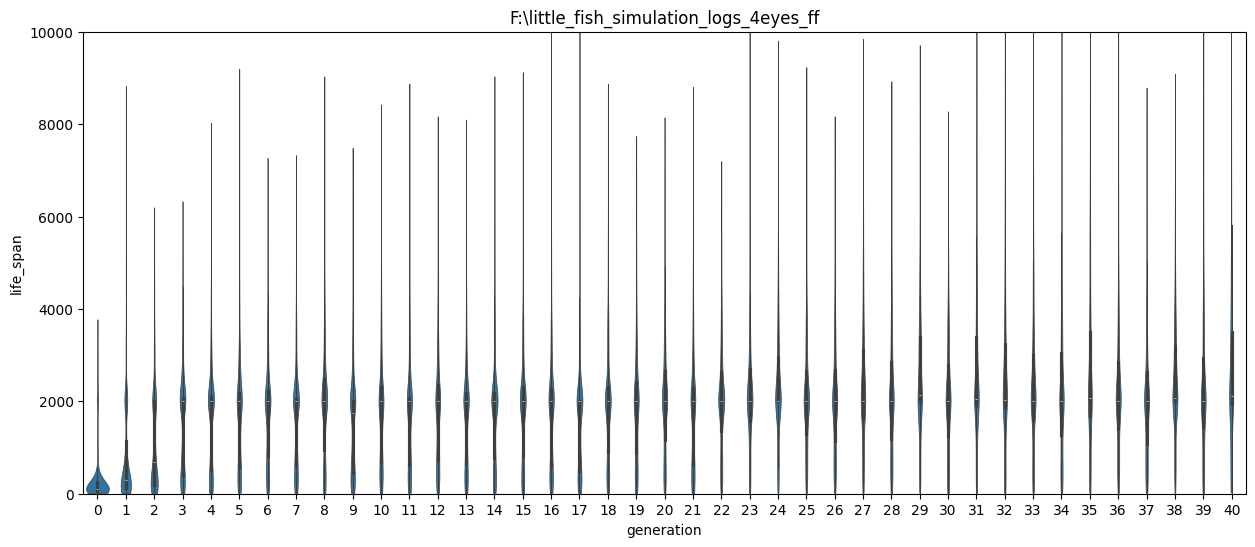

In [6]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

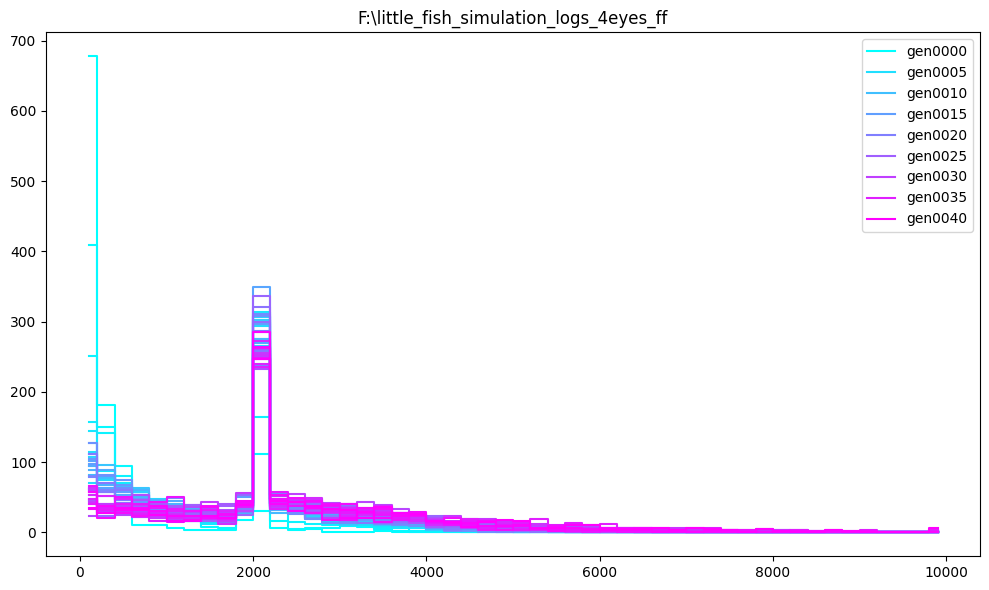

In [7]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()